In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
#from lightgbm import LGBMRegressor,plot_importance
#import lightgbm
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_squared_log_error

In [50]:
import os


In [51]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_5aa410b0faa54ae29f032078a829db35 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='12egA_g4qE2AIIHuUD0d0qCe8GBlVOQJ3udLV2MF7olY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_5aa410b0faa54ae29f032078a829db35.get_object(Bucket='warehousemanagement-donotdelete-pr-t9x5bzr6pi4gqz',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [52]:

body = client_5aa410b0faa54ae29f032078a829db35.get_object(Bucket='warehousemanagement-donotdelete-pr-t9x5bzr6pi4gqz',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [53]:

body = client_5aa410b0faa54ae29f032078a829db35.get_object(Bucket='warehousemanagement-donotdelete-pr-t9x5bzr6pi4gqz',Key='meal_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

meal_info = pd.read_csv(body)
meal_info.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [54]:

body = client_5aa410b0faa54ae29f032078a829db35.get_object(Bucket='warehousemanagement-donotdelete-pr-t9x5bzr6pi4gqz',Key='fulfilment_center_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

fulfilment_center  = pd.read_csv(body)
fulfilment_center .head()


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [55]:
train.isnull().sum()    #checking the missing values


id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [56]:
test.isnull().sum()    #checking the missing values


id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [57]:
train.apply(lambda x: len(x.unique()))  #finding count of distinct elements 


id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
dtype: int64

In [58]:
train=pd.merge(train,fulfilment_center,on='center_id')   #merging the training set with fulfilment set 
test=pd.merge(test,fulfilment_center,on='center_id')   #merging the testing set with fulfilment set 

train=pd.merge(train,meal_info,on='meal_id')           #merging the new training set with meal_info 
test=pd.merge(test,meal_info,on='meal_id')             #merging the new testing set with meal_info
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [59]:
train.info()    #obtaining the combined dataset information


<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
center_type              456548 non-null object
op_area                  456548 non-null float64
category                 456548 non-null object
cuisine                  456548 non-null object
dtypes: float64(3), int64(9), object(3)
memory usage: 55.7+ MB


In [60]:
train['category'].unique()


array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

In [61]:
train['cuisine'].unique()


array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [62]:
train['center_type'].unique()


array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

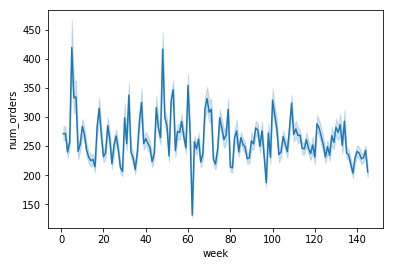

In [63]:
sns.lineplot(train['week'],train['num_orders'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

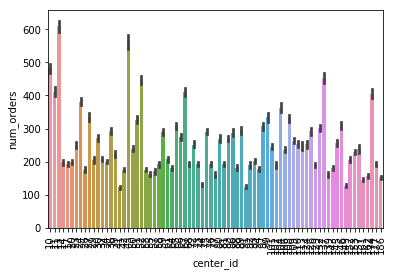

In [16]:
sns.barplot(train['center_id'],train['num_orders'])
plt.rcParams["figure.figsize"]=40,10

plt.xticks(rotation=90)

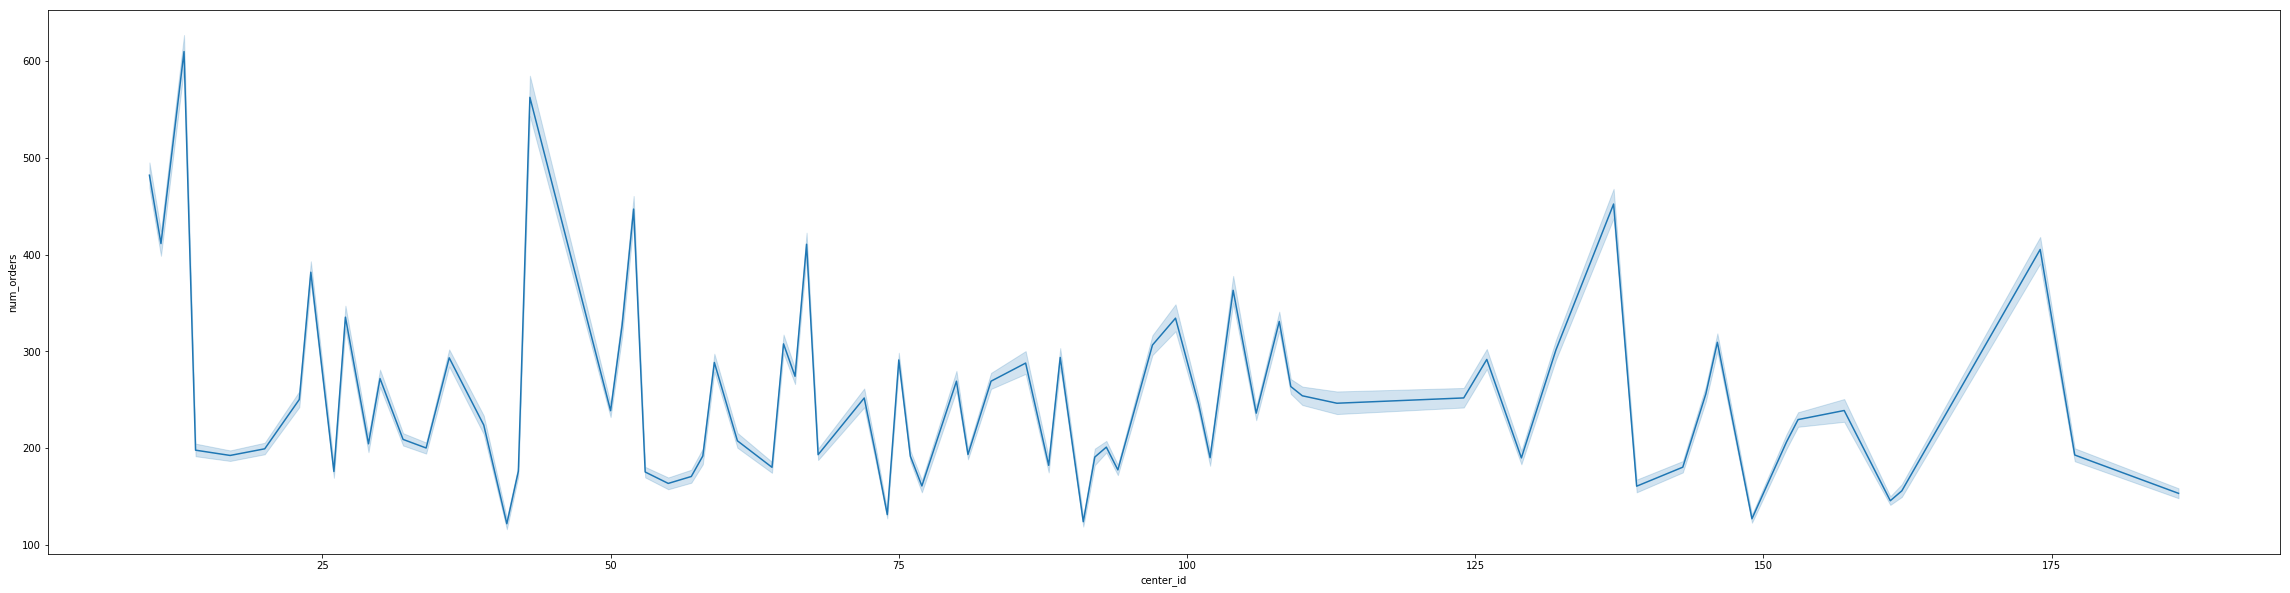

In [17]:
sns.lineplot(train['center_id'],train['num_orders'])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

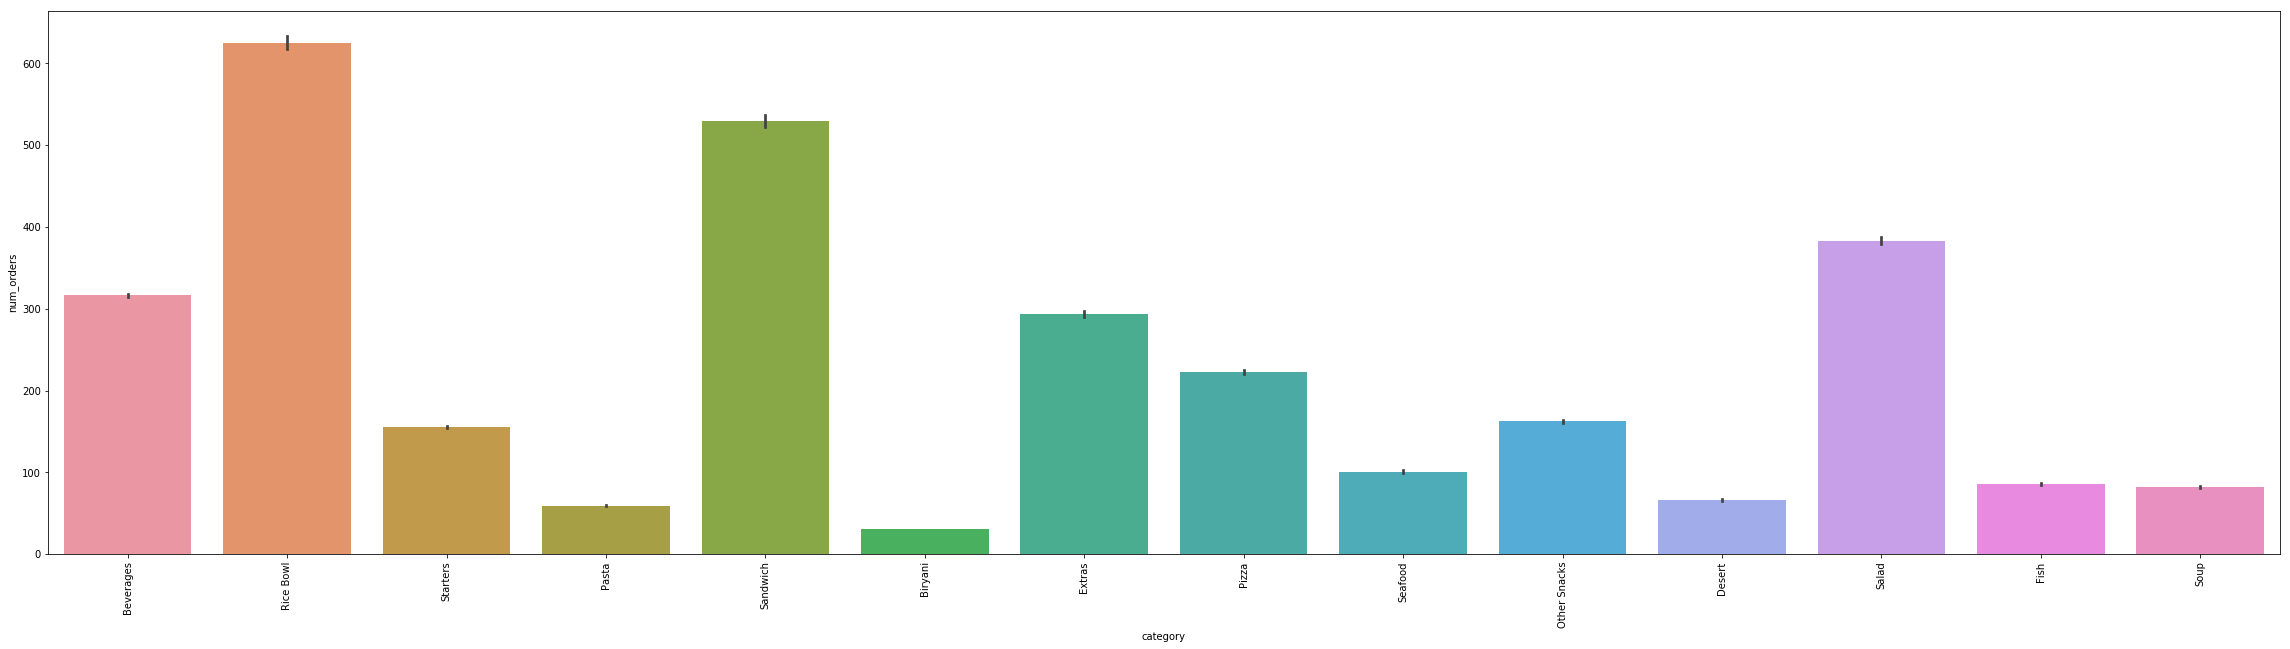

In [18]:
sns.barplot(train['category'],train['num_orders'])
plt.rcParams["figure.figsize"]=20,20
plt.xticks(rotation='90')

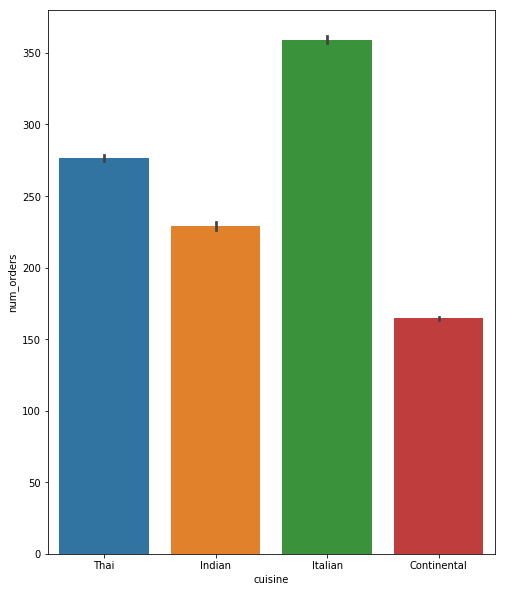

In [24]:
sns.barplot(train['cuisine'],train['num_orders'])
plt.rcParams["figure.figsize"]=20,10

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

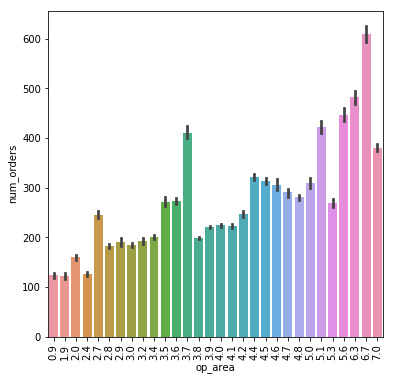

In [29]:
sns.barplot(train['op_area'],train['num_orders'])
plt.xticks(rotation=90)


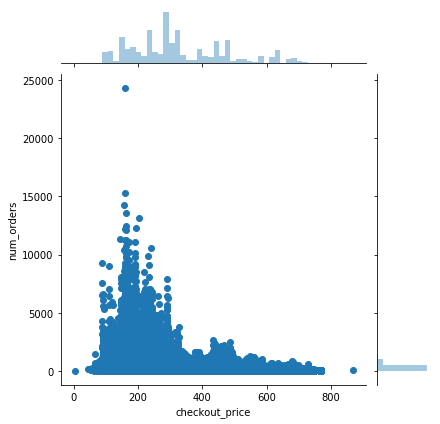

In [21]:
sns.jointplot(x='checkout_price',y='num_orders',data=train)     #joint plot for outlier to be removed 


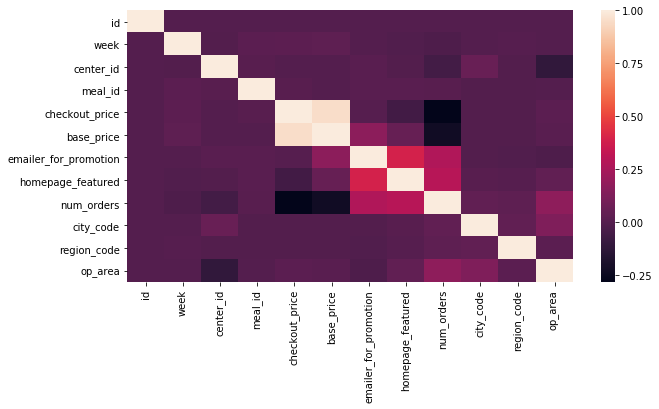

In [23]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr())



In [64]:
train['category'].unique()




array(['Beverages', 'Rice Bowl', 'Starters', 'Pasta', 'Sandwich',
       'Biryani', 'Extras', 'Pizza', 'Seafood', 'Other Snacks', 'Desert',
       'Salad', 'Fish', 'Soup'], dtype=object)

In [65]:
train['cuisine'].unique()


array(['Thai', 'Indian', 'Italian', 'Continental'], dtype=object)

In [66]:
train['center_type'].unique()


array(['TYPE_C', 'TYPE_B', 'TYPE_A'], dtype=object)

In [67]:
from sklearn import preprocessing

In [68]:
label_encoder=preprocessing.LabelEncoder()


In [69]:
train['category']=label_encoder.fit_transform(train['category'])
train['category'].unique()

array([ 0,  8, 13,  6, 10,  1,  3,  7, 11,  5,  2,  9,  4, 12])

In [70]:
train['cuisine']=label_encoder.fit_transform(train['cuisine'])
train['cuisine'].unique()

array([3, 1, 2, 0])

In [71]:
train['center_type']=label_encoder.fit_transform(train['center_type'])
train['center_type'].unique()

array([2, 1, 0])

In [72]:
test['category']=label_encoder.fit_transform(test['category'])
test['category'].unique()

array([ 0,  8, 13, 10,  3,  7, 11,  5,  2,  9,  6,  4,  1, 12])

In [73]:
test['cuisine']=label_encoder.fit_transform(test['cuisine'])
test['cuisine'].unique()


array([3, 1, 2, 0])

In [74]:
test['center_type']=label_encoder.fit_transform(test['center_type'])
test['center_type'].unique()

array([2, 1, 0])

In [75]:
X = train.drop('num_orders',axis = 1)
#features = ['center_id', 'meal_id']
#X=train[features]
y = train['num_orders']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [77]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 305887 entries, 255712 to 121958
Data columns (total 14 columns):
id                       305887 non-null int64
week                     305887 non-null int64
center_id                305887 non-null int64
meal_id                  305887 non-null int64
checkout_price           305887 non-null float64
base_price               305887 non-null float64
emailer_for_promotion    305887 non-null int64
homepage_featured        305887 non-null int64
city_code                305887 non-null int64
region_code              305887 non-null int64
center_type              305887 non-null int64
op_area                  305887 non-null float64
category                 305887 non-null int64
cuisine                  305887 non-null int64
dtypes: float64(3), int64(11)
memory usage: 35.0 MB


In [78]:
X_train.isnull().sum()


id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [79]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150661 entries, 203536 to 350694
Data columns (total 14 columns):
id                       150661 non-null int64
week                     150661 non-null int64
center_id                150661 non-null int64
meal_id                  150661 non-null int64
checkout_price           150661 non-null float64
base_price               150661 non-null float64
emailer_for_promotion    150661 non-null int64
homepage_featured        150661 non-null int64
city_code                150661 non-null int64
region_code              150661 non-null int64
center_type              150661 non-null int64
op_area                  150661 non-null float64
category                 150661 non-null int64
cuisine                  150661 non-null int64
dtypes: float64(3), int64(11)
memory usage: 17.2 MB


In [80]:
X_test.isnull().sum()


id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [81]:
X_train.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
255712,1099638,10,14,2581,582.03,583.03,0,0,654,56,2,2.7,7,0
265198,1354312,140,137,1962,548.08,639.23,0,0,590,56,0,4.4,7,0
341047,1495043,102,137,1543,484.03,486.03,0,0,590,56,0,4.4,2,1
82680,1476459,63,43,1062,182.39,183.39,0,0,590,56,0,5.1,0,2
72045,1072304,130,102,1778,174.66,174.66,0,0,593,77,0,2.8,0,2


In [82]:
X_test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
203536,1322714,142,97,1754,328.83,330.83,0,0,628,77,0,4.6,10,2
301801,1492563,58,99,1525,243.53,292.03,0,0,596,71,0,4.5,5,3
254032,1161457,54,137,2581,678.03,680.03,0,0,590,56,0,4.4,7,0
339158,1351834,120,146,1543,393.82,472.39,0,0,526,34,1,5.0,2,1
3203,1371356,54,91,1885,122.25,147.50,0,0,590,56,2,0.9,0,3


In [83]:
y_test.head()


203536    501
301801    216
254032    109
339158    310
3203       54
Name: num_orders, dtype: int64

In [84]:
y_train.head()


255712     81
265198    581
341047     27
82680     636
72045     284
Name: num_orders, dtype: int64

In [85]:
np.where(np.isnan(X_test))


(array([], dtype=int64), array([], dtype=int64))

In [86]:
np.where(np.isnan(X_train))


(array([], dtype=int64), array([], dtype=int64))

In [87]:
np.nan_to_num(X_train)    



array([[1.099638e+06, 1.000000e+01, 1.400000e+01, ..., 2.700000e+00,
        7.000000e+00, 0.000000e+00],
       [1.354312e+06, 1.400000e+02, 1.370000e+02, ..., 4.400000e+00,
        7.000000e+00, 0.000000e+00],
       [1.495043e+06, 1.020000e+02, 1.370000e+02, ..., 4.400000e+00,
        2.000000e+00, 1.000000e+00],
       ...,
       [1.134846e+06, 1.000000e+01, 3.600000e+01, ..., 4.400000e+00,
        8.000000e+00, 1.000000e+00],
       [1.358376e+06, 3.800000e+01, 2.900000e+01, ..., 4.000000e+00,
        8.000000e+00, 1.000000e+00],
       [1.217916e+06, 7.500000e+01, 6.400000e+01, ..., 4.400000e+00,
        0.000000e+00, 0.000000e+00]])

In [88]:
np.nan_to_num(X_test)


array([[1.322714e+06, 1.420000e+02, 9.700000e+01, ..., 4.600000e+00,
        1.000000e+01, 2.000000e+00],
       [1.492563e+06, 5.800000e+01, 9.900000e+01, ..., 4.500000e+00,
        5.000000e+00, 3.000000e+00],
       [1.161457e+06, 5.400000e+01, 1.370000e+02, ..., 4.400000e+00,
        7.000000e+00, 0.000000e+00],
       ...,
       [1.116807e+06, 7.900000e+01, 3.900000e+01, ..., 3.800000e+00,
        0.000000e+00, 0.000000e+00],
       [1.057518e+06, 6.800000e+01, 5.800000e+01, ..., 3.800000e+00,
        2.000000e+00, 1.000000e+00],
       [1.407842e+06, 1.030000e+02, 9.400000e+01, ..., 3.600000e+00,
        6.000000e+00, 2.000000e+00]])

In [89]:
np.nan_to_num(y_train)


array([ 81, 581,  27, ..., 663, 284, 122])

In [90]:
np.nan_to_num(y_test)


array([501, 216, 109, ..., 190,  41,  42])

In [91]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()
regr.fit(X_train, y_train)

predictions = regr.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [92]:
mse=mean_squared_error(predictions,y_test)
print(np.sqrt(mse))

162.1597309774164


In [93]:
print(round(regr.score(X_test,y_test)*100),"%")

83.0 %


In [94]:
print(round(regr.score(X_train,y_train)*100),"%")

97.0 %


In [95]:
from scipy.stats import spearmanr,pearsonr
spearman=spearmanr(y_test,predictions)
pearson=pearsonr(y_test,predictions)
print("Spearman Correlation: ",(spearman[0]))
print("Pearson Correlation: ",(pearson[0]))

Spearman Correlation:  0.9144741164968283
Pearson Correlation:  0.9110722456106283


In [96]:
pd.DataFrame(predictions, y_test).reset_index().corr()


,num_orders,0
num_orders,1.000000,0.911072
0,0.911072,1.000000


In [97]:
predictions   

array([466.5, 338.8, 161.4, ..., 158.3,  31.8,  57.5])

In [107]:
New1=[[1379560,1,55,1885,136.83,152.29,0,0,647,56,2,2.0,0,3]]   #checking a prediction1
p1=regr.predict(New1)
print(p1)

[189.8]


In [108]:
New2=[[1343872,5,55,1885,146.50,147.50,0,0,647,56,2,2.0,0,3]]   #checking a prediction2
p2=regr.predict(New2)
print(p2)

[197.8]


In [101]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient


2020-07-15 06:43:44,613 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [102]:
wml_credentials={
  "apikey": "RhE_N4ZzdMo0_j4KzHTW5O7OZ4Is92F1a8IRTmu8XWki",
  "iam_apikey_description": "Auto-generated for key 978549bc-ad8b-41aa-9c49-e574ff3385f5",
  "iam_apikey_name": "Service credentials-3",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/7859bec5cd73407f881cf400e5ec19d3::serviceid:ServiceId-d04f9a61-dcbf-4c15-a721-ff04728e9d3e",
  "instance_id": "8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [103]:
client =WatsonMachineLearningAPIClient(wml_credentials)


In [104]:
metadata={
    client.repository.ModelMetaNames.AUTHOR_NAME:"Deeksha",
    client.repository.ModelMetaNames.AUTHOR_EMAIL:"2017.deeksha.patkar@ves.ac.in",
    client.repository.ModelMetaNames.NAME: "FinalIBM_Model"
}

In [105]:
stored_data=client.repository.store_model(regr,meta_props=metadata)


In [106]:
stored_data

{'metadata': {'guid': '59946a39-22b3-42f6-9aef-d8240286a8de',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9/published_models/59946a39-22b3-42f6-9aef-d8240286a8de',
  'created_at': '2020-07-15T06:43:45.170Z',
  'modified_at': '2020-07-15T06:43:45.228Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9/published_models/59946a39-22b3-42f6-9aef-d8240286a8de/learning_configuration',
  'author': {'name': 'Deeksha'},
  'name': 'FinalIBM_Model',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9/published_models/59946a39-22b3-42f6-9aef-d8240286a8de/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9/published_models/59946a39-22b3-42f6-9aef-d8240286a8de/feedback',
  'latest_version': {'url': 'h

In [109]:
guid=client.repository.get_model_uid(stored_data)


In [110]:
guid

'59946a39-22b3-42f6-9aef-d8240286a8de'

In [111]:
deploy=client.deployments.create(guid)




#######################################################################################

Synchronous deployment creation for uid: '59946a39-22b3-42f6-9aef-d8240286a8de' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='c36c1164-73ee-4c77-9d0a-690c19422e95'
------------------------------------------------------------------------------------------------




In [112]:
client.deployments.list()


------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME                 TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
c36c1164-73ee-4c77-9d0a-690c19422e95  Artifact deployment  online  DEPLOY_SUCCESS  2020-07-15T06:45:49.802Z  scikit-learn-0.20  model
bcecff7f-3247-41d1-ba38-960edbf07554  Artifact deployment  online  DEPLOY_SUCCESS  2020-07-02T14:30:32.814Z  scikit-learn-0.20  model
86f7700b-f57c-4432-a441-dae343303566  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-24T07:11:37.085Z  scikit-learn-0.20  model
31b39b5b-afb8-434c-b176-dda4b0ba3474  Artifact deployment  online  DEPLOY_SUCCESS  2020-06-24T06:59:46.987Z  scikit-learn-0.20  model
------------------------------------  -------------------  ------  --------------  ------------------------  -----------------  -------------


In [113]:
deploy

{'metadata': {'guid': 'c36c1164-73ee-4c77-9d0a-690c19422e95',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9/deployments/c36c1164-73ee-4c77-9d0a-690c19422e95',
  'created_at': '2020-07-15T06:45:49.802Z',
  'modified_at': '2020-07-15T06:45:50.095Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'name': 'Artifact deployment',
  'scoring_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9/deployments/c36c1164-73ee-4c77-9d0a-690c19422e95/online',
  'deployable_asset': {'name': 'FinalIBM_Model',
   'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9/published_models/59946a39-22b3-42f6-9aef-d8240286a8de',
   'guid': '59946a39-22b3-42f6-9aef-d8240286a8de',
   'created_at': '2020-07-15T06:45:49.778Z',
   'type': 'model'},
  'description': 'Description of deployment',
  'status_details': {'status': 'DEPLOY_SUCCESS'},
  'model_type': 'scikit-learn-0.20',
  'statu

In [114]:
scoring_endpoint=client.deployments.get_scoring_url(deploy)


In [115]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/8e4ab1c9-8a40-416b-9deb-2b6ca14c6ae9/deployments/c36c1164-73ee-4c77-9d0a-690c19422e95/online'